# Importing Libraries and Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab_ csv_files /Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Preprocessing

In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

Datatype of "TotalCharges" is changed to numeric from object since it has numeric values which might helps in future possible numeric operations.

In [8]:
df.duplicated().sum()

np.int64(0)

# Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**Now, let's analyze how other factors influence churn by comparing and plotting them against the churn variable.**

<Axes: xlabel='Churn', ylabel='count'>

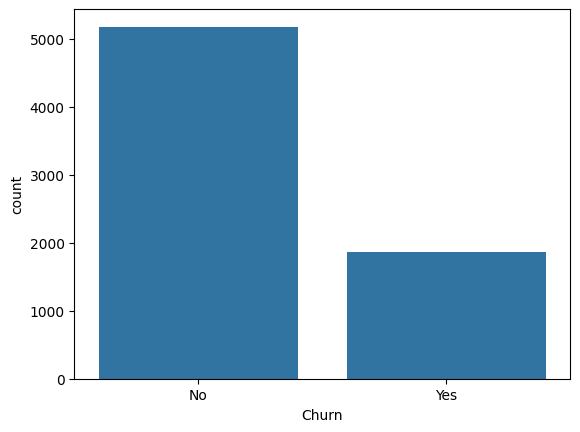

In [10]:
sns.countplot(data=df, x="Churn")

Seems like,in this dataset Customers not leaving is more.

<Axes: xlabel='Churn', ylabel='tenure'>

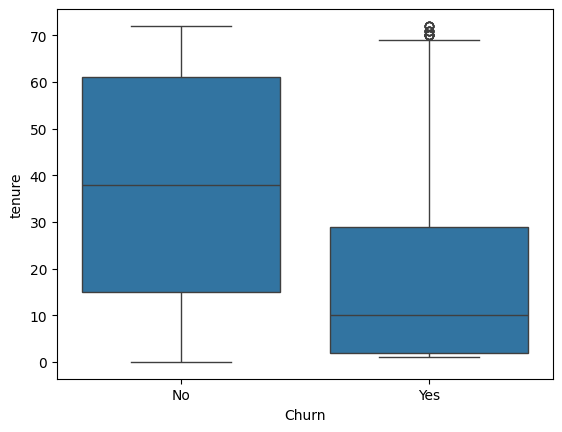

In [11]:
sns.boxplot(data=df, x="Churn", y="tenure")

It shows churn rate is more with the customers with shorter tenure and Loyal customers stayed more than 40 moths.

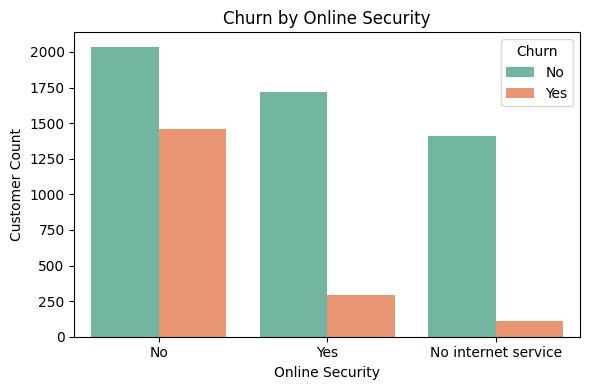

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Set2')
plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

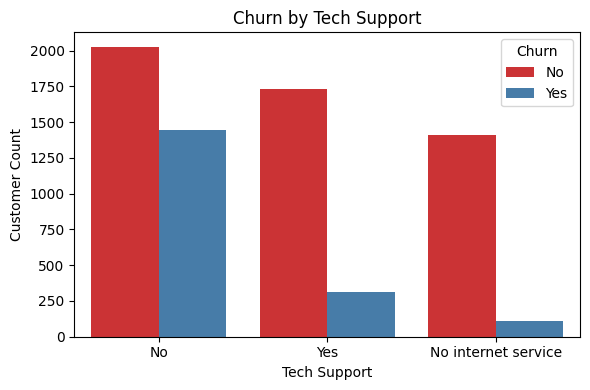

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set1')
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Customers leave where there is no online security and Tech support.

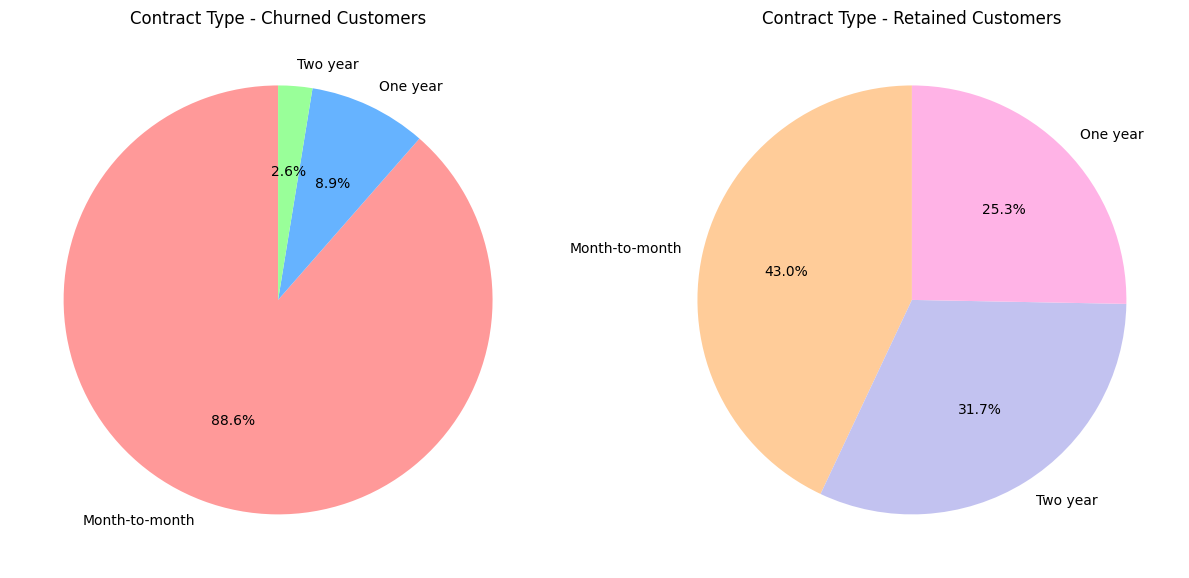

In [49]:
churn_yes=df[df['Churn']=='Yes']['Contract'].value_counts()
churn_no=df[df['Churn']=='No']['Contract'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(churn_yes, labels=churn_yes.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
ax[0].set_title('Contract Type - Churned Customers')
ax[1].pie(churn_no, labels=churn_no.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#c2c2f0','#ffb3e6'])
ax[1].set_title('Contract Type - Retained Customers')
plt.tight_layout()
plt.show()

In both churned and retained customer groups, the majority of customers are on month-to-month contracts. However, it can be concluded that customers with two-year contracts are more likely to stay, as the churn rate is significantly lower among them.

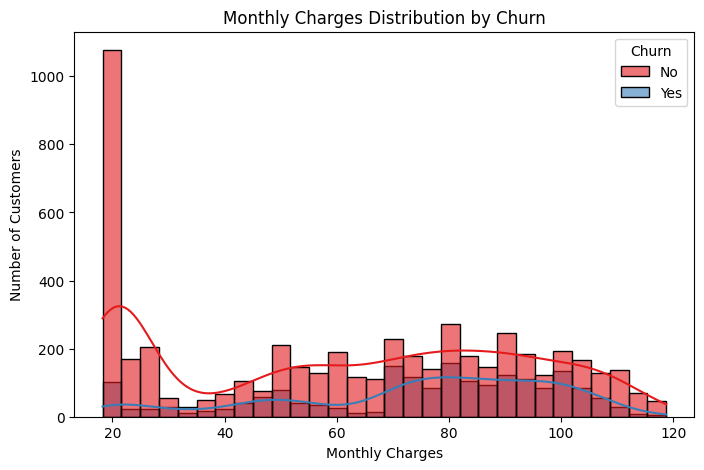

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30, palette='Set1', alpha=0.6)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

Customers prefer services with low charges.

/tmp/ipython-input-51-2391231690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y='TotalCharges', palette='Set2')


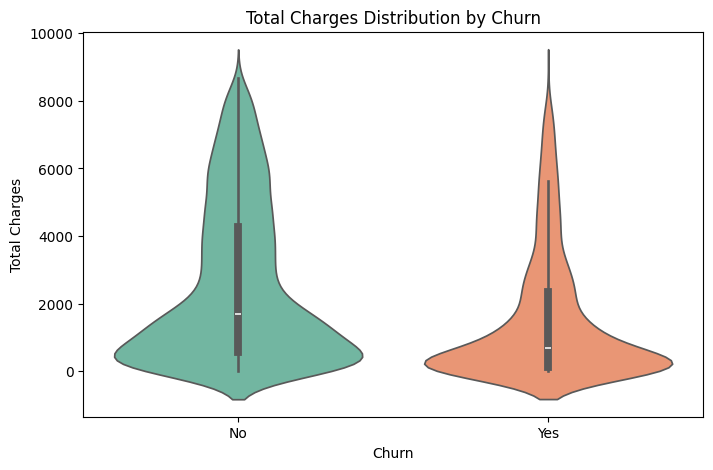

In [51]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Total Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

The violin plot indicates that churned customers typically leave early, as reflected by the narrower top of the distribution, concentrated around low TotalCharges.
In contrast, retained customers show a broader distribution across higher TotalCharges, meaning they not only stay longer but continue to accumulate charges over time — highlighting stronger loyalty and longer tenure.

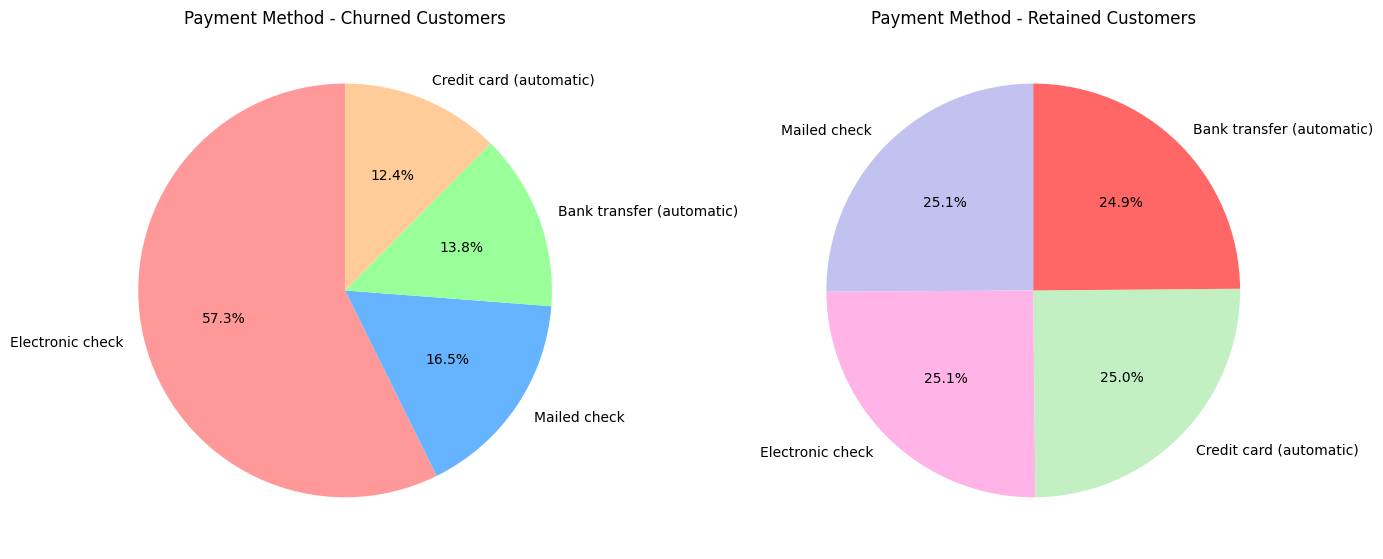

In [52]:
churn_yes = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
churn_no = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(churn_yes, labels=churn_yes.index, autopct='%1.1f%%', startangle=90,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[0].set_title('Payment Method - Churned Customers')
ax[1].pie(churn_no, labels=churn_no.index, autopct='%1.1f%%', startangle=90,colors=['#c2c2f0','#ffb3e6','#c2f0c2','#ff6666'])
ax[1].set_title('Payment Method - Retained Customers')
plt.tight_layout()
plt.show()

Customers who churned were more likely to use Electronic Check as their payment method, indicating a possible correlation between manual payment behavior and churn.
In contrast, retained customers predominantly used automatic payment methods such as Bank Transfer or Credit Card, suggesting they are either more committed or less engaged with the billing process, possibly due to convenience.

# Preprocessing: Encoding & Scaling

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with NaN in 'TotalCharges' introduced by coercion
df.dropna(subset=['TotalCharges'], inplace=True)

# Encode categorical columns
df_encoded = pd.get_dummies(df.drop('Churn', axis=1))
df_encoded['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop('Churn', axis=1))
y = df_encoded['Churn']

# Model Building: Logistic Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

# Model Evaluation

Accuracy: 0.7391613361762616
Confusion Matrix:
 [[750 283]
 [ 84 290]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

ROC-AUC Score: 0.8239642596455989


Text(0.5, 1.0, 'ROC Curve')

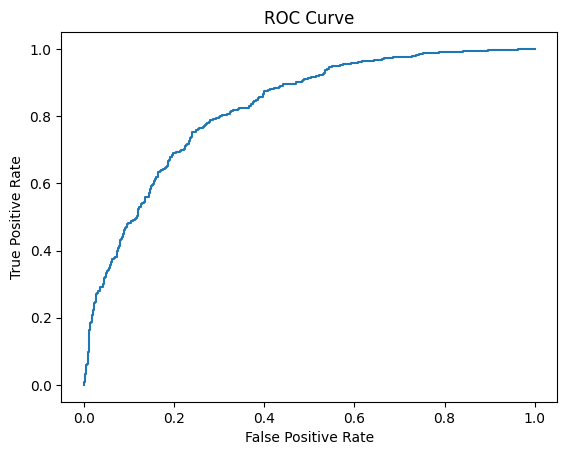

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Interpretation of Results

**Top predictors**



* Contract Type
* Tenure
* Monthly Charges
* Payment Method
* Online Security
* Tech Support







**Why logistic Regression is suitable?**



* Well-Suited for Binary Classification
* Performs Well When Classes Are Linearly Separable
* Efficient and Fast
* Works Well with One-Hot Encoded Categorical Features





**Actionable Insights**



1. Target Short-Tenure Customers
   * Send welcome offers, loyalty points, or exclusive upgrades within the first few months.
   * Trigger automated check-ins via call/email during their 2nd and 3rd month.

2.  Upsell Long-Term Contracts

   * Offer discounted yearly plans with benefits like free support or additional data.
   * Promote auto-renewal with small incentives.

3. Bundle Online Security and Tech Support
   
   * Bundle these services into standard packages.
   * Offer free trials for OnlineSecurity and TechSupport to new users.

4. Prioritize Senior Customers or Those Paying by Cheque

   * Educate customers on easier payment methods like auto-debit or credit cards.
   * Offer discounts on switching payment methods.

5. Focus on Fiber Optic Customers
   
   * Investigate complaints/feedback about Fiber service.
   * Offer premium customer care for fiber users.

6. Proactively Contact High-Risk Customers

   * Use this list for targeted retention campaigns.
   * Call them with personalized offers or satisfaction surveys.

7. Monitor Monthly Usage Patterns

   * Flag such accounts for account manager follow-ups.
   * Offer custom retention plans.






